## Exploratory Data Analysis
为什么做：了解数据、产生直觉，甚至可以人眼看出公式（不行也可以作为启发式）
方法：
库：

In [138]:
import pandas as pd
import seaborn as sn

In [139]:
df = pd.read_json('数字化全唐诗.json')
print(df.head())
df.describe()

                             title  author  \
0          [377, 491, 883, 2, 144]     107   
1     [532, 101, 34, 79, 1832, 42]     107   
2        [1579, 1650, 321, 8, 216]     107   
3               [287, 13, 249, 82]     107   
4  [616, 400, 446, 937, 1123, 193]     107   

                                             content  
0  [358, 328, 756, 377, 657, 0, 1899, 877, 959, 3...  
1  [465, 164, 322, 18, 1216, 0, 522, 237, 676, 11...  
2  [1579, 1650, 321, 8, 216, 0, 646, 796, 249, 10...  
3  [608, 18, 111, 699, 395, 0, 1358, 1145, 320, 1...  
4  [982, 711, 590, 147, 520, 0, 4312, 1085, 809, ...  


,author
count,42014.000000
mean,166.289213
std,381.748356
min,0.000000
25%,13.000000
50%,43.000000
75%,119.000000
max,2631.000000


In [140]:
print(df.shape)
df.dtypes

(42014, 3)


title      object
author      int64
content    object
dtype: object

In [141]:
df['author'] = df['author'].astype(int)
df.dtypes

title      object
author      int32
content    object
dtype: object

In [142]:
df[:][0:5]

,title,author,content
0,"[377, 491, 883, 2, 144]",107,"[358, 328, 756, 377, 657, 0, 1899, 877, 959, 3..."
1,"[532, 101, 34, 79, 1832, 42]",107,"[465, 164, 322, 18, 1216, 0, 522, 237, 676, 11..."
2,"[1579, 1650, 321, 8, 216]",107,"[1579, 1650, 321, 8, 216, 0, 646, 796, 249, 10..."
3,"[287, 13, 249, 82]",107,"[608, 18, 111, 699, 395, 0, 1358, 1145, 320, 1..."
4,"[616, 400, 446, 937, 1123, 193]",107,"[982, 711, 590, 147, 520, 0, 4312, 1085, 809, ..."


<AxesSubplot:ylabel='Frequency'>

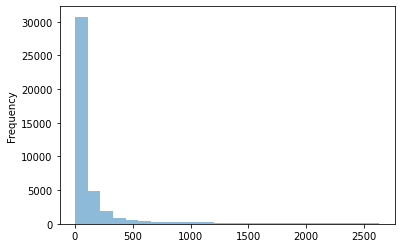

In [143]:
df['author'].plot.hist(bins=24, alpha=0.5)# 当然是这样，我排过序的。
# ? 白居易只有两千多手诗啊，30000是什么鬼

In [144]:
Data = df[['content']] # 我觉得可以实验一下：单独使用标题的准确率和单独使用content的准确率，确定关系。
Label = df['author']
print(Data.head())
Label.head()

                                             content
0  [358, 328, 756, 377, 657, 0, 1899, 877, 959, 3...
1  [465, 164, 322, 18, 1216, 0, 522, 237, 676, 11...
2  [1579, 1650, 321, 8, 216, 0, 646, 796, 249, 10...
3  [608, 18, 111, 699, 395, 0, 1358, 1145, 320, 1...
4  [982, 711, 590, 147, 520, 0, 4312, 1085, 809, ...


0    107
1    107
2    107
3    107
4    107
Name: author, dtype: int32

In [145]:
data = Data.to_numpy()
label = Label.to_numpy()

In [146]:
import numpy as np
array = df[['content', 'author']].to_numpy()
array

array([[list([358, 328, 756, 377, 657, 0, 1899, 877, 959, 355, 68, 1, 931, 496, 94, 292, 168, 0, 196, 193, 4, 1881, 225, 1, 274, 4260, 305, 652, 223, 0, 106, 430, 1066, 866, 375, 1, 21, 13, 231, 1124, 528, 0, 18, 122, 86, 931, 406, 1, 466, 1602, 618, 748, 1970, 0, 1234, 210, 996, 1135, 1460, 1, 78, 1679, 1337, 172, 585, 0, 71, 1953, 953, 345, 2604, 1, 426, 1945, 316, 747, 1504, 0, 2404, 2858, 1178, 116, 3, 1, 288, 50, 809, 1499, 222, 0, 1454, 1971, 430, 1596, 1753, 1, 452, 456, 86, 544, 131, 0, 1107, 915, 1616, 400, 440, 1, 1076, 1301, 1209, 58, 29, 0, 2165, 101, 524, 110, 1760, 1, 311, 388, 84, 375, 604, 0, 558, 569, 322, 766, 1341, 1, 2166, 718, 895, 74, 509, 0, 513, 737, 809, 546, 1488, 1, 348, 1612, 249, 169, 686, 0, 1732, 351, 476, 264, 395, 1, 766, 753, 582, 409, 604, 0, 52, 72, 594, 25, 134, 1, 649, 345, 1047, 28, 1058, 0, 511, 279, 667, 120, 818, 1, 55, 737, 556, 1393, 96, 0, 1171, 573, 138, 127, 2129, 1, 264, 1162, 1006, 1033, 1375, 0, 868, 836, 424, 74, 912, 1, 592, 800, 357,

In [147]:
from collections import Counter
a = Counter(label)
a = dict(a)
# 一共两千多个(0-2631)诗人，有多少个写得诗少呢？
c = 0
# filter_value = 2 # 1429 居然有一半是诗人只传唱了一首诗？
# filter_value = 20 # 2384
# filter_value = 30 # 2434
filter_value = 60 # 2498
for 诗人 in set(Label):
    if a[诗人]<filter_value:
        c+=1
print(c)
len(set(Label))

2498


2632

In [148]:
filter_values = range(3000)
def get_more_than(filter_value):
    c = 0
    for 诗人 in set(Label):
        if a[诗人]>=filter_value:
            c+=1
    return c
poets = list(map(get_more_than, filter_values))

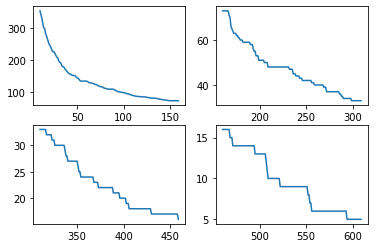

In [149]:
import matplotlib.pyplot as plt
def draw(start = 0, step=5):
    a, b = start, start+step
    for plot_position in [221, 222, 223, 224]:
        plt.subplot(plot_position)
        plt.plot(filter_values[a:b], poets[a:b])
        a, b = b, b+step
draw(10, 150)

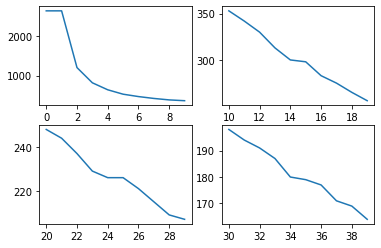

In [150]:
draw(0, 10)

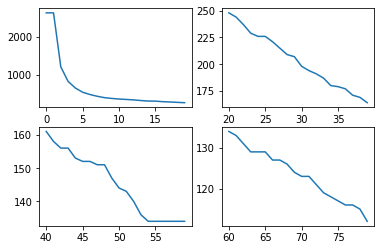

In [151]:
draw(0, 20)

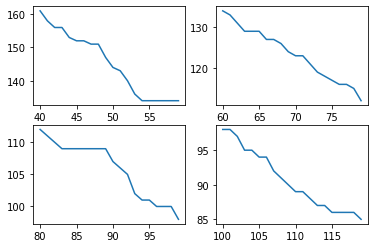

In [152]:
draw(40, 20)

In [153]:
# 去除掉不出名的诗人
assert len(data)==len(label)
is_famous = np.zeros(len(label))
for i, 诗人 in enumerate(label):
    if a[诗人]>95: #排名前100诗人
        is_famous[i] = 1
is_famous.astype(bool)
# data, label = data[is_famous], label[is_famous] # 居然不行？

array([False, False, False, ...,  True, False, False])

In [166]:
np.array(data[0]).shape
data[0][0]

[358,
 328,
 756,
 377,
 657,
 0,
 1899,
 877,
 959,
 355,
 68,
 1,
 931,
 496,
 94,
 292,
 168,
 0,
 196,
 193,
 4,
 1881,
 225,
 1,
 274,
 4260,
 305,
 652,
 223,
 0,
 106,
 430,
 1066,
 866,
 375,
 1,
 21,
 13,
 231,
 1124,
 528,
 0,
 18,
 122,
 86,
 931,
 406,
 1,
 466,
 1602,
 618,
 748,
 1970,
 0,
 1234,
 210,
 996,
 1135,
 1460,
 1,
 78,
 1679,
 1337,
 172,
 585,
 0,
 71,
 1953,
 953,
 345,
 2604,
 1,
 426,
 1945,
 316,
 747,
 1504,
 0,
 2404,
 2858,
 1178,
 116,
 3,
 1,
 288,
 50,
 809,
 1499,
 222,
 0,
 1454,
 1971,
 430,
 1596,
 1753,
 1,
 452,
 456,
 86,
 544,
 131,
 0,
 1107,
 915,
 1616,
 400,
 440,
 1,
 1076,
 1301,
 1209,
 58,
 29,
 0,
 2165,
 101,
 524,
 110,
 1760,
 1,
 311,
 388,
 84,
 375,
 604,
 0,
 558,
 569,
 322,
 766,
 1341,
 1,
 2166,
 718,
 895,
 74,
 509,
 0,
 513,
 737,
 809,
 546,
 1488,
 1,
 348,
 1612,
 249,
 169,
 686,
 0,
 1732,
 351,
 476,
 264,
 395,
 1,
 766,
 753,
 582,
 409,
 604,
 0,
 52,
 72,
 594,
 25,
 134,
 1,
 649,
 345,
 1047,
 28,
 1058,
 0

In [173]:
new_data, new_label = [], []
for i in range(len(label)):
    if(is_famous[i]):
        # new_data.append(np.array(data[i][0], dtype=int))
        # new_label.append(np.array(label[i], dtype=int))
        new_data.append(data[i][0])
        new_label.append(label[i])
assert len(new_data) == len(new_label)
len(new_data)
print(new_data[0:2])
new_label[0:2]

[[603, 241, 899, 1686, 0, 169, 335, 809, 457, 1, 129, 398, 136, 312, 0, 355, 2310, 382, 344, 1, 288, 530, 59, 26, 0, 382, 58, 1433, 242, 1, 2787, 154, 1869, 20, 0, 1561, 815, 49, 24, 1], [172, 220, 1841, 172, 172, 117, 106, 0, 172, 332, 123, 26, 26, 6, 1302, 1, 220, 111, 26, 223, 184, 161, 65, 0, 39, 609, 1935, 19, 4, 328, 31, 0, 28, 82, 50, 121, 177, 69, 36, 1]]


[92, 63]

In [174]:
new_data, new_label = np.array(new_data, int), np.array(new_label, int)
assert len(new_data) == len(new_label)
print(len(new_data))
new_data.shape # 不齐次，所以转不了！！

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (29847,) + inhomogeneous part.

In [130]:
from sklearn.model_selection import train_test_split
# train_x,test_x,train_y,test_y = train_test_split(data, label, test_size = 0.2,random_state = 32, stratify=label)
train_x,test_x,train_y,test_y = train_test_split(new_data, new_label, test_size = 0.2,random_state = 32, stratify=new_label)


In [131]:
print(train_x.shape)
print(train_x[0])
test_y

(23877, 1)
[list([1309, 1309, 186, 1309, 1309, 0, 1217, 1487, 27, 32, 1445, 1, 42, 97, 17, 194, 336, 0, 1187, 1149, 240, 456, 688, 1, 1071, 80, 1318, 1501, 250, 0, 428, 18, 287, 346, 1224, 1, 52, 852, 5, 427, 1173, 0, 127, 270, 864, 4, 965, 1])]


array([70, 72, 30, ...,  4, 29, 63])

In [132]:
print(type(train_x))
print(train_x.dtype)
test_y.dtype

<class 'numpy.ndarray'>
object


dtype('int32')

In [133]:
np.savez('唐诗处理后数据集', train_x=train_x,test_x=test_x,train_y=train_y,test_y=test_y)

In [136]:
with np.load('唐诗处理后数据集.npz', allow_pickle=True) as data:
    print(data.files)
    train_x,test_x,train_y,test_y = data['train_x'], data['test_x'], data['train_y'], data['test_y']
train_x

['train_x', 'test_x', 'train_y', 'test_y']


array([[list([1309, 1309, 186, 1309, 1309, 0, 1217, 1487, 27, 32, 1445, 1, 42, 97, 17, 194, 336, 0, 1187, 1149, 240, 456, 688, 1, 1071, 80, 1318, 1501, 250, 0, 428, 18, 287, 346, 1224, 1, 52, 852, 5, 427, 1173, 0, 127, 270, 864, 4, 965, 1])],
       [list([87, 852, 265, 18, 29, 0, 1590, 568, 59, 27, 67, 1, 39, 22, 691, 7, 130, 0, 548, 120, 433, 156, 308, 1, 69, 337, 1885, 611, 194, 0, 56, 337, 1827, 1157, 736, 1, 66, 646, 91, 259, 1480, 0, 386, 646, 417, 156, 645, 1])],
       [list([27, 32, 933, 1682, 182, 0, 1975, 2023, 469, 790, 2803, 1, 243, 465, 195, 367, 1341, 0, 43, 337, 177, 1023, 596, 1, 132, 752, 1515, 60, 238, 0, 794, 849, 672, 362, 655, 1, 403, 3250, 344, 394, 269, 0, 74, 282, 6, 2502, 95, 1])],
       ...,
       [list([1647, 363, 264, 0, 1647, 363, 264, 0, 161, 71, 1452, 2722, 178, 78, 675, 1, 94, 687, 909, 762, 439, 1633, 1633, 0, 182, 7, 2954, 108, 25, 15, 130, 0, 73, 1151, 421, 30, 259, 6, 157, 1, 260, 253, 268, 913, 683, 331, 925, 0, 567, 194, 74, 151, 231, 1146, 673,